# YFinance Exploration
The app will rely on yfinance for a small variety of functions. Will need to get the price of a stock currently, get stock price data for some interval, and if possible, return some sort of stream of all tickers, companies, industries et cetera. This file is just for me to figure out how to use yfinance to suit these needs.

In [45]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import ssl

### Get Stock Current Price an Info:

In [46]:
MSFT = yf.Ticker("MSFT")
info = MSFT.info

company_name = info['longName']
industry = info['industry']
sector = info['sector']

print(f"Company Name: {company_name}")
print(f"Industry: {industry}")
print(f"Sector: {sector}")

Company Name: Microsoft Corporation
Industry: Software - Infrastructure
Sector: Technology


In [47]:
# get current price of the stock
MSFT.fast_info.last_price

431.934814453125

### Get Stock Data over Interval

[*********************100%%**********************]  1 of 1 completed


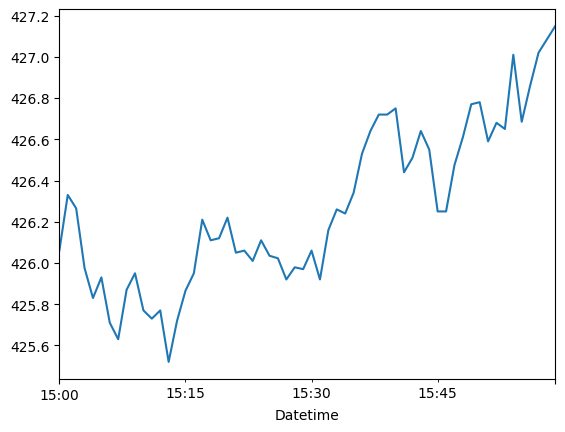

In [67]:
# get the price movement of the stock today
data = yf.download(tickers="MSFT", period="1h", interval="1m")

graph = data.Close.plot()

[*********************100%%**********************]  1 of 1 completed


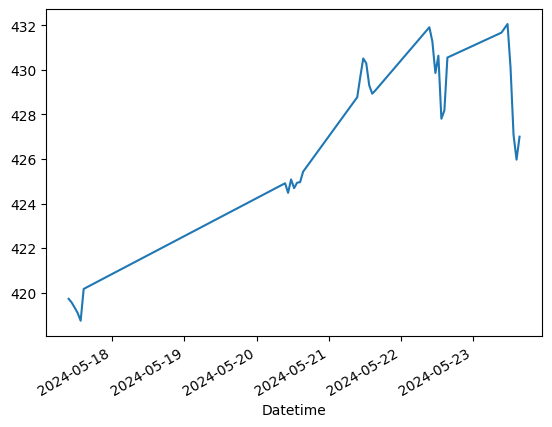

In [69]:
# get the price movement of the stock for the last week
data = yf.download(tickers="MSFT", period="1wk", interval="1h")
graph = data.Close.plot()

[*********************100%%**********************]  1 of 1 completed


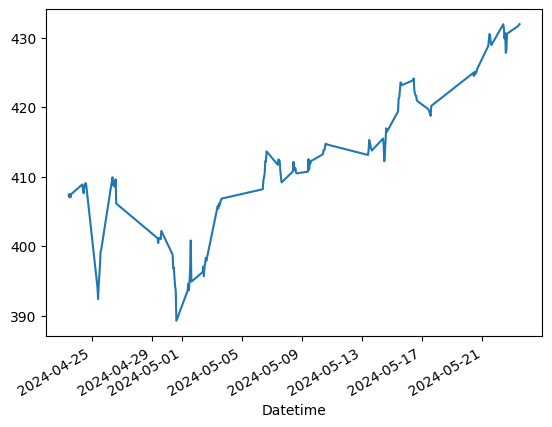

In [50]:
# get the price movement of the stock for the last month
data = yf.download(tickers="MSFT", period="1mo", interval="1h")
graph = data.Close.plot()

[*********************100%%**********************]  1 of 1 completed


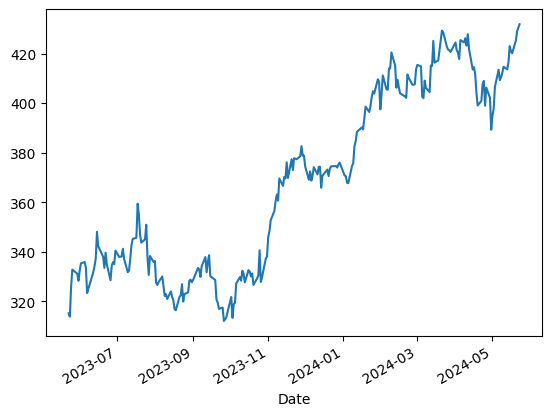

In [51]:
# get the price movement of the stock for the last year
data = yf.download(tickers="MSFT", period="1y", interval="1d")
graph = data.Close.plot()

[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>


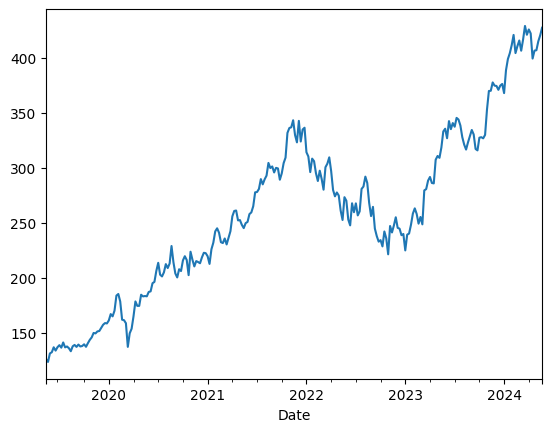

In [64]:
# get the price movement of the stock for the last 5 years
data = yf.download(tickers="MSFT", period="5y", interval="1wk")
graph = data.Close.plot()

[*********************100%%**********************]  1 of 1 completed


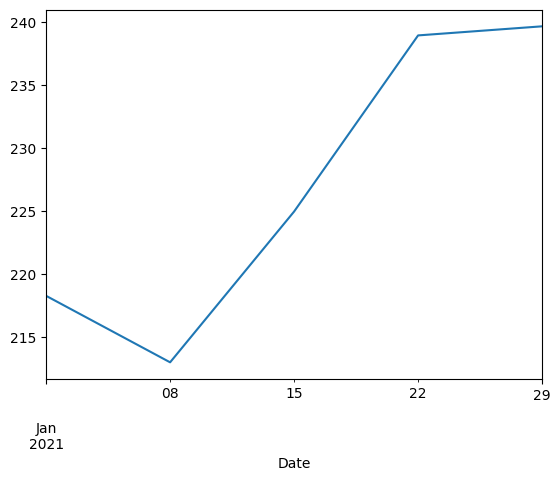

In [60]:
# get the price movement of the stock over a custom period
start = "2021-01-01"
end = "2021-02-01"

# get number of days between start and end
days = pd.to_datetime(end) - pd.to_datetime(start)

current_date = datetime.now()
start_date = pd.to_datetime(start)

# difference in days between start and end
interval_size = (current_date - start_date).days

difference = (current_date - start_date).days
if difference <= 730:
    if interval_size <= 1:
        interval = "1m"
    if interval_size <= 7:
        interval = "5m"
    if interval_size <= 30:
        interval = "1h"
    if interval_size <= 365:
        interval = "1d"
    else:
        interval = "1wk"
else:
    if interval_size >= 365:
        interval = "1wk"
    else:
        interval = "1d"

data = yf.download(tickers="MSFT", start=start, end=end, interval=interval)

graph = data.Close.plot()

### Get data for all stocks 

In [63]:
if hasattr(ssl, '_create_unverified_context'):
    ssl._create_default_https_context = ssl._create_unverified_context

table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df['Symbol'].tolist()

print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C